In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import (symbols, Function, rsolve, Eq, series, factor, 
                   simplify, apart, O, solve as sympy_solve,
                   collect)
# --- ВИЗНАЧЕННЯ ФУНКЦІЙ, ЩО БУДУТЬ ВИКОРИСТОВУВАТИСЯ ---

# --- Еталонний аналітичний розв'язок для Рівняння * ---
def analytical_sol_eq2_char(k_val):
    # y_k = 2.5 - 2*(2**k_val) + 0.5*(3**k_val)
    return 2.5 - (2**(k_val + 1)) + 0.5 * (3**k_val)

# --- Чисельний розв'язок для рівняння n-го порядку ---
def solve_diff_eq_higher_order_direct(coeffs_p, initial_conditions, num_terms):
    """
    Розв'язує y_{k+n} + p1*y_{k+n-1} + ... + pn*y_k = 0
    де coeffs_p = [p1, p2, ..., pn] (коефіцієнти при y_{k+n-1} ... y_k)
    Рівняння в формі для ітерації: y_{k+n} = - (p1*y_{k+n-1} + ... + pn*y_k)
    initial_conditions - список або масив з n початкових умов y0, ..., y_{n-1}
    """
    order = len(initial_conditions) # Порядок рівняння n
    if len(coeffs_p) != order:
        raise ValueError("Кількість коефіцієнтів p_i має відповідати порядку рівняння.")

    if num_terms <= 0: return np.array([])
    if num_terms < order: return np.array(initial_conditions[:num_terms]) # Повертаємо лише доступні початкові
    
    solution = np.zeros(num_terms)
    solution[:order] = initial_conditions # Заповнюємо початкові умови
    
    # y_{k+order} = - (coeffs_p[0]*y_{k+order-1} + coeffs_p[1]*y_{k+order-2} + ... + coeffs_p[order-1]*y_k)
    # Індексація solution: solution[i] це y_i
    # Для обчислення solution[k_target_idx = k_current_base_idx + order]
    # нам потрібні solution[k_target_idx - 1], solution[k_target_idx - 2], ..., solution[k_target_idx - order]
    # або solution[k_current_base_idx + order -1], ..., solution[k_current_base_idx]
    
    for k_base in range(num_terms - order): # k_base йде від 0 до num_terms - order - 1
        y_target_idx = k_base + order       # індекс для y_{k+n}
        
        sum_prev_terms = 0
        for j in range(order): # j йде від 0 до order-1
            # coeffs_p[j] це p_{j+1}
            # y_term_idx = (k_base + order - 1) - j
            y_term_idx = y_target_idx - 1 - j
            sum_prev_terms += coeffs_p[j] * solution[y_term_idx]
            
        solution[y_target_idx] = -sum_prev_terms
        
    return solution



In [11]:
# --- ОСНОВНА ПРАКТИЧНА ЧАСТИНА ---

print("--- РОЗДІЛ 2: АНАЛІТИЧНІ МЕТОДИ (з графіками для Рівняння *) ---")
print("Рівняння *: y_{k+3} - 6y_{k+2} + 11y_{k+1} - 6y_k = 0")
print("Початкові умови: y0=1, y1=0, y2=-1")
print(f"Аналітичний розв'язок: y_k = 2.5 - 2^(k+1) + 0.5 * 3^k")

N_TERMS_PRACTICAL = 15 
k_values_practical = np.arange(N_TERMS_PRACTICAL)

# 2.5.1.1. Метод характеристичного рівняння
print("\n--- 1.1. Метод характеристичного рівняння ---")
y_analytical_char_practical = np.array([analytical_sol_eq2_char(k) for k in k_values_practical])
print(f"Еталонний аналітичний розв'язок (перші {N_TERMS_PRACTICAL} значень):")
for k_val, y_val in zip(k_values_practical, y_analytical_char_practical):
    print(f"k={k_val}, y_k={y_val:.4f}")

# Перевірка за допомогою SymPy rsolve
k_sym_prac = symbols('k', integer=True, nonnegative=True)
y_sym_prac = Function('y')
eq_sympy_prac = Eq(y_sym_prac(k_sym_prac+3) - 6*y_sym_prac(k_sym_prac+2) + 11*y_sym_prac(k_sym_prac+1) - 6*y_sym_prac(k_sym_prac), 0)
initial_cond_sympy_prac = {y_sym_prac(0): 1, y_sym_prac(1): 0, y_sym_prac(2): -1}
y_sympy_values_prac = np.full_like(y_analytical_char_practical, np.nan, dtype=float)

try:
    sol_sympy_prac = rsolve(eq_sympy_prac, y_sym_prac(k_sym_prac), initial_cond_sympy_prac)
    if sol_sympy_prac:
        print(f"\nРозв'язок Sympy rsolve: {sol_sympy_prac}")
        y_sympy_values_prac = np.array([sol_sympy_prac.subs(k_sym_prac, val).evalf() for val in k_values_practical], dtype=float)
        sympy_check_prac = np.allclose(y_analytical_char_practical, y_sympy_values_prac)
        print(f"Перевірка Sympy rsolve з аналітичним (ручним): {'Збігається' if sympy_check_prac else 'Не збігається'}")
    else:
        print("Sympy rsolve не зміг знайти розв'язок.")
except Exception as e:
    print(f"Помилка при розв'язанні Sympy rsolve: {e}")
print("-" * 70)

--- РОЗДІЛ 2: АНАЛІТИЧНІ МЕТОДИ (з графіками для Рівняння 2) ---
Рівняння *: y_{k+3} - 6y_{k+2} + 11y_{k+1} - 6y_k = 0
Початкові умови: y0=1, y1=0, y2=-1
Аналітичний розв'язок: y_k = 2.5 - 2^(k+1) + 0.5 * 3^k

--- 1.1. Метод характеристичного рівняння ---
Еталонний аналітичний розв'язок (перші 15 значень):
k=0, y_k=1.0000
k=1, y_k=0.0000
k=2, y_k=-1.0000
k=3, y_k=0.0000
k=4, y_k=11.0000
k=5, y_k=60.0000
k=6, y_k=239.0000
k=7, y_k=840.0000
k=8, y_k=2771.0000
k=9, y_k=8820.0000
k=10, y_k=27479.0000
k=11, y_k=84480.0000
k=12, y_k=257531.0000
k=13, y_k=780780.0000
k=14, y_k=2358719.0000

Розв'язок Sympy rsolve: -2*2**k + 3**k/2 + 5/2
Перевірка Sympy rsolve з аналітичним (ручним): Збігається
----------------------------------------------------------------------


In [12]:
# 2.5.1.2. Метод твірних функцій
print("\n--- 1.2. Метод твірних функцій ---")
s_sym_gf = symbols('s')
y0_gf, y1_gf, y2_gf = 1, 0, -1
Y_s_var_gf = symbols('Y_s_var_gf') 

term_yk3_gf_eq2 = (Y_s_var_gf - y0_gf - y1_gf*s_sym_gf - y2_gf*s_sym_gf**2) / s_sym_gf**3
term_yk2_gf_eq2 = (Y_s_var_gf - y0_gf - y1_gf*s_sym_gf) / s_sym_gf**2
term_yk1_gf_eq2 = (Y_s_var_gf - y0_gf) / s_sym_gf
term_yk0_gf_eq2 = Y_s_var_gf

eq_gf_eq2 = Eq(term_yk3_gf_eq2 - 6*term_yk2_gf_eq2 + 11*term_yk1_gf_eq2 - 6*term_yk0_gf_eq2, 0)
print(f"\nРівняння для твірної функції (SymPy): {simplify(eq_gf_eq2.lhs - eq_gf_eq2.rhs)} = 0")

y_gen_func_coeffs_eq2_plot = np.full_like(y_analytical_char_practical, np.nan, dtype=float)
try:
    # Використовуємо sympy.solve замість глобального solve
    sol_Y_s_expr_eq2_list = sympy_solve(eq_gf_eq2, Y_s_var_gf)
    if sol_Y_s_expr_eq2_list:
        sol_Y_s_expr_eq2 = simplify(sol_Y_s_expr_eq2_list[0])
        print(f"Твірна функція Y(s) (SymPy): {sol_Y_s_expr_eq2}")
        
        try:
            # Y_s_final_expr = (10*s_sym_gf**2 - 6*s_sym_gf + 1)/(-6*s_sym_gf**3 + 11*s_sym_gf**2 - 6*s_sym_gf + 1)
            Y_s_partial_fractions = apart(sol_Y_s_expr_eq2, s_sym_gf, full=True)
            print(f"Розклад Y(s) на прості дроби (SymPy): {Y_s_partial_fractions.doit()}")
        except Exception as e_pf:
            print(f"Помилка при розкладі Y(s) на прості дроби (твірні функції): {e_pf}")

        series_expansion_gf = series(sol_Y_s_expr_eq2, s_sym_gf, 0, N_TERMS_PRACTICAL)
        temp_coeffs_gf = []
        for i in range(N_TERMS_PRACTICAL):
            coeff = series_expansion_gf.coeff(s_sym_gf, i)
            if isinstance(coeff, O):
                if i == 0 and hasattr(series_expansion_gf, 'args') and series_expansion_gf.args and not series_expansion_gf.args[0].has(s_sym_gf):
                     temp_coeffs_gf.append(float(series_expansion_gf.args[0]))
                else:
                    temp_coeffs_gf.append(np.nan)
            else:
                temp_coeffs_gf.append(float(coeff))
        y_gen_func_coeffs_eq2_plot = np.array(temp_coeffs_gf)

        print(f"Розв'язок з твірних функцій (коефіцієнти ряду SymPy): {y_gen_func_coeffs_eq2_plot}")
        valid_indices_gf_plot = ~np.isnan(y_gen_func_coeffs_eq2_plot)
        if np.any(valid_indices_gf_plot):
            gf_check_plot = np.allclose(y_analytical_char_practical[valid_indices_gf_plot], y_gen_func_coeffs_eq2_plot[valid_indices_gf_plot])
            print(f"Перевірка збігу методу твірних функцій (SymPy) з аналітичним: {'Збігається' if gf_check_plot else 'Не збігається або частково'}")
        else:
            print("Не вдалося отримати коефіцієнти з розкладу твірної функції для порівняння.")
    else:
        print("Не вдалося розв'язати для Y(s) методом твірних функцій в SymPy.")
except Exception as e:
    print(f"Загальна помилка при роботі з твірними функціями в SymPy: {e}")
print("-" * 70)


--- 1.2. Метод твірних функцій ---

Рівняння для твірної функції (SymPy): (-6*Y_s_var_gf*s**3 + Y_s_var_gf + 11*s**2*(Y_s_var_gf - 1) + s**2 + 6*s*(1 - Y_s_var_gf) - 1)/s**3 = 0
Твірна функція Y(s) (SymPy): (-10*s**2 + 6*s - 1)/(6*s**3 - 11*s**2 + 6*s - 1)
Розклад Y(s) на прості дроби (SymPy): -1/(2*(3*s - 1)) + 2/(2*s - 1) - 5/(2*(s - 1))
Розв'язок з твірних функцій (коефіцієнти ряду SymPy): [ 1.000000e+00  0.000000e+00 -1.000000e+00  0.000000e+00  1.100000e+01
  6.000000e+01  2.390000e+02  8.400000e+02  2.771000e+03  8.820000e+03
  2.747900e+04  8.448000e+04  2.575310e+05  7.807800e+05  2.358719e+06]
Перевірка збігу методу твірних функцій (SymPy) з аналітичним: Збігається
----------------------------------------------------------------------


In [13]:
# 2.5.1.3. Метод Z-перетворення
from sympy import symbols, Eq, solve as sympy_solve, simplify, apart
print("\n--- 1.3. Метод Z-перетворення ---")
z = symbols('z')
Y_z = symbols('Y_z')

# Задані початкові значення
y0, y1, y2 = 1, 0, -1

# Вирази для Z[y_k]
Z_yk0 = Y_z
Z_yk1 = z * (Y_z - y0)
Z_yk2 = z**2 * (Y_z - y0 - y1 * z**-1)
Z_yk3 = z**3 * (Y_z - y0 - y1 * z**-1 - y2 * z**-2)

# Складання рівняння
eq = Eq(Z_yk3 - 6 * Z_yk2 + 11 * Z_yk1 - 6 * Z_yk0, 0)

# Розв'язуємо для Y(z)
sol = sympy_solve(eq, Y_z)
if sol:
    Y_z_expr = simplify(sol[0])
    print(f"Z-образ Y(z): {Y_z_expr}")
    # Очікуваний вигляд: (z**3 - 6*z**2 + 10*z) / (z**3 - 6*z**2 + 11*z - 6)

    # Розкладаємо на прості дроби
    Y_z_apart = apart(Y_z_expr, z)
    print(f"Розклад на прості дроби: {Y_z_apart}")

    # Отримуємо коефіцієнти вручну (наприклад, через розкладання)
    # Тут ми просто обчислюємо чисельно перші кілька значень y_k:
    from sympy import Poly
    num_poly = Poly(Y_z_expr.as_numer_denom()[0], z)
    den_poly = Poly(Y_z_expr.as_numer_denom()[1], z)

    num_coeffs = np.array(num_poly.all_coeffs(), dtype=float)
    den_coeffs = np.array(den_poly.all_coeffs(), dtype=float)

    # Використовуємо lfilter для знаходження y_k (сигнал виходу)
    from scipy.signal import lfilter

    k_values = np.arange(len(y_analytical_char_practical))  # наприклад, 0..N
    # Ми підставляємо одиничний вхід (1, 0, 0, ...) щоб обчислити вихідну відповідь
    impulse_input = np.zeros_like(k_values)
    impulse_input[0] = 1

    y_z_values = lfilter(num_coeffs, den_coeffs, impulse_input)
    print(f"Перші значення y_k з Z-перетворення (чисельно): {y_z_values}")

    zt_check_plot = np.allclose(y_analytical_char_practical, y_z_values)
    print(f"Перевірка збігу Z-перетворення з аналітичним: {'Збігається' if zt_check_plot else 'Не збігається'}")

else:
    print("Не вдалося розв'язати для Y(z).")

print("-" * 70)


--- 1.3. Метод Z-перетворення ---
Z-образ Y(z): z*(z**2 - 6*z + 10)/(z**3 - 6*z**2 + 11*z - 6)
Розклад на прості дроби: 1 + 5/(2*(z - 1)) - 4/(z - 2) + 3/(2*(z - 3))
Перші значення y_k з Z-перетворення (чисельно): [ 1.000000e+00  0.000000e+00 -1.000000e+00  0.000000e+00  1.100000e+01
  6.000000e+01  2.390000e+02  8.400000e+02  2.771000e+03  8.820000e+03
  2.747900e+04  8.448000e+04  2.575310e+05  7.807800e+05  2.358719e+06]
Перевірка збігу Z-перетворення з аналітичним: Збігається
----------------------------------------------------------------------


In [14]:
# 2.5.1.4. Операторні методи
print("\n--- 1.4. Операторні методи ---")
lambda_sym_op_prac = symbols('lambda')
char_poly_op_prac = lambda_sym_op_prac**3 - 6*lambda_sym_op_prac**2 + 11*lambda_sym_op_prac - 6
factored_poly_op_prac = factor(char_poly_op_prac)
print(f"Характеристичний поліном L(lambda): {char_poly_op_prac}")
print(f"Розклад L(lambda) на множники: {factored_poly_op_prac}")
print("Це приводить до загального розв'язку y_k = C1*(1)^k + C2*(2)^k + C3*(3)^k.")
print(f"З початковими умовами отримуємо y_k = 2.5 - 2*2^k + 0.5*3^k (збігається з аналітичним).")
print("-" * 70)

# --- Чисельний розв'язок (пряма ітерація) для порівняння з усіма аналітичними ---
# Коефіцієнти для y_{k+3} + p1*y_{k+2} + p2*y_{k+1} + p3*y_k = 0
# Для y_{k+3} - 6y_{k+2} + 11y_{k+1} - 6y_k = 0  => p1=-6, p2=11, p3=-6
coeffs_p_eq2_num = [-6, 11, -6] 
initial_cond_eq2_num = [1, 0, -1] # y0, y1, y2
y_numerical_eq2_plot_final = solve_diff_eq_higher_order_direct(coeffs_p_eq2_num, initial_cond_eq2_num, N_TERMS_PRACTICAL)


--- 1.4. Операторні методи ---
Характеристичний поліном L(lambda): lambda**3 - 6*lambda**2 + 11*lambda - 6
Розклад L(lambda) на множники: (lambda - 3)*(lambda - 2)*(lambda - 1)
Це приводить до загального розв'язку y_k = C1*(1)^k + C2*(2)^k + C3*(3)^k.
З початковими умовами отримуємо y_k = 2.5 - 2*2^k + 0.5*3^k (збігається з аналітичним).
----------------------------------------------------------------------


--- 1. Детальний Аналіз Накопичення Похибок для Рівняння * ---


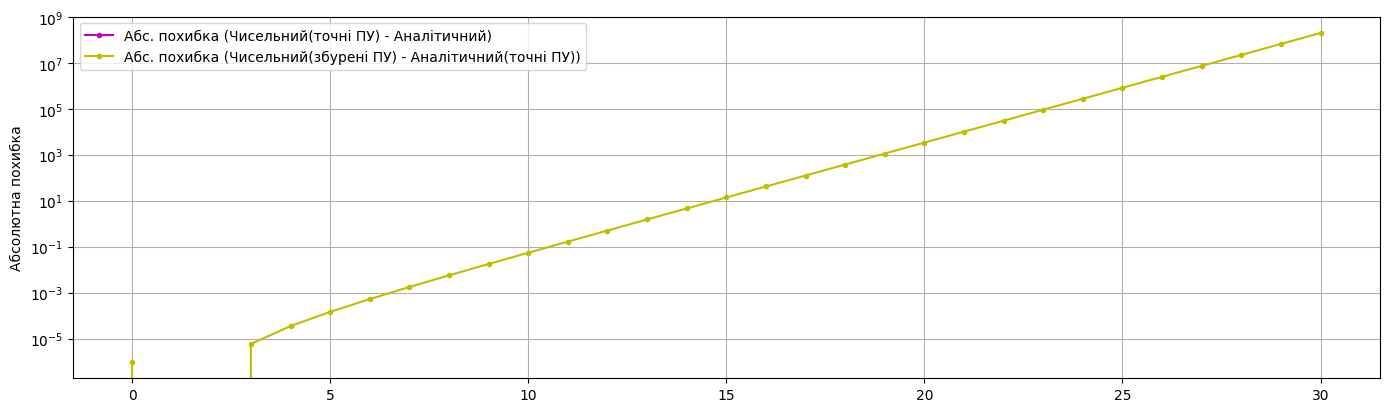

In [15]:
# --- 2.5.5.1 Детальний аналіз накопичення похибок для чисельного методу 
#(прямої ітерації) на довшому інтервалі та вплив початкової похибки ---
def analytical_sol_eq2_char(k_val):
    return 2.5 - (2**(k_val + 1)) + 0.5 * (3**k_val)

def solve_homogeneous_direct(coeffs_p, initial_conditions, num_terms):
    order = len(initial_conditions)
    if len(coeffs_p) != order:
        raise ValueError("Кількість коефіцієнтів p_i має відповідати порядку рівняння.")
    if num_terms <= 0: return np.array([])
    if num_terms < order: return np.array(initial_conditions[:num_terms])
    solution = np.zeros(num_terms)
    solution[:order] = initial_conditions
    for k_base in range(num_terms - order):
        y_target_idx = k_base + order
        sum_prev_terms = 0
        for j in range(order):
            y_term_idx = y_target_idx - 1 - j
            sum_prev_terms += coeffs_p[j] * solution[y_term_idx]
        solution[y_target_idx] = -sum_prev_terms
    return solution

# --- 1. Детальний Аналіз Накопичення Похибок ---
print("--- 1. Детальний Аналіз Накопичення Похибок для Рівняння * ---")
N_TERMS_LONG_ERROR = 31 # k від 0 до 30
k_values_long_error = np.arange(N_TERMS_LONG_ERROR)

coeffs_p_eq2 = [-6, 11, -6] 
initial_cond_eq2_exact = [1.0, 0.0, -1.0] 

# Розв'язок з точними початковими умовами
y_analytical_exact = np.array([analytical_sol_eq2_char(k) for k in k_values_long_error])
y_numerical_exact = solve_homogeneous_direct(coeffs_p_eq2, initial_cond_eq2_exact, N_TERMS_LONG_ERROR)

abs_error_long = np.abs(y_numerical_exact - y_analytical_exact)
safe_analytical_exact = np.where(y_analytical_exact == 0, 1e-16, y_analytical_exact)
rel_error_long = np.abs(abs_error_long / safe_analytical_exact) * 100

# Розв'язок з невеликою похибкою в y0
initial_cond_eq2_perturbed_small = [1.000001, 0.0, -1.0] 
y_numerical_perturbed_small = solve_homogeneous_direct(coeffs_p_eq2, initial_cond_eq2_perturbed_small, N_TERMS_LONG_ERROR)
abs_error_perturbed_vs_exact_analytical = np.abs(y_numerical_perturbed_small - y_analytical_exact)

plt.figure(figsize=(14, 12))

plt.subplot(3, 1, 1)
plt.plot(k_values_long_error, abs_error_long, 'm.-', label='Абс. похибка (Чисельний(точні ПУ) - Аналітичний)')
plt.plot(k_values_long_error, abs_error_perturbed_vs_exact_analytical, 'y.-', label='Абс. похибка (Чисельний(збурені ПУ) - Аналітичний(точні ПУ))')
plt.ylabel('Абсолютна похибка')
plt.yscale('log')
plt.grid(True)
plt.legend()


plt.tight_layout()
plt.savefig('eq2_long_error_and_perturbation_analysis.png')
plt.show()


--- 2. Чутливість Коренів Характеристичного Рівняння ---
Для рівняння: lambda^3 - 6*lambda^2 + p2*lambda - 6 = 0 (базове p2=11)


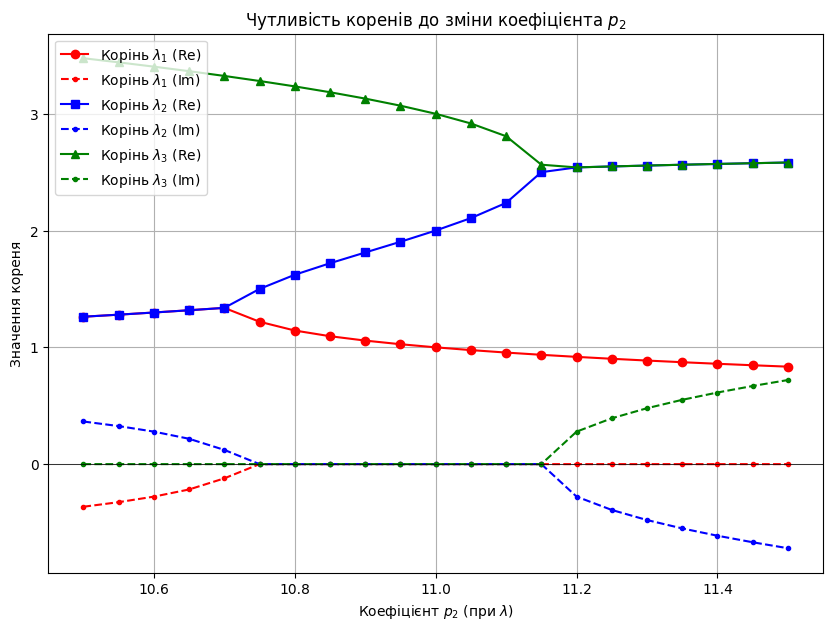

Досліджено зміну коренів при p2 в діапазоні [10.50, 11.50]
  Базові корені при p2=11: [1.0, 2.0, 3.0]
  Корені при p2=10.50: [1.26215674-0.36501784j 1.26215674+0.36501784j 3.47568652+0.j        ]
  Корені при p2=11.50: [0.83462696+0.j         2.58268652-0.72011856j 2.58268652+0.72011856j]

Аналіз модулів коренів:
p2=10.50: Корені=[1.26215674-0.36501784j 1.26215674+0.36501784j 3.47568652+0.j        ], Модулі=[1.31387886 1.31387886 3.47568652]
p2=10.55: Корені=[1.2797888 -0.32574919j 1.2797888 +0.32574919j 3.44042241+0.j        ], Модулі=[1.32059528 1.32059528 3.44042241]
p2=10.60: Корені=[1.29822023-0.27836044j 1.29822023+0.27836044j 3.40355954+0.j        ], Модулі=[1.3277275  1.3277275  3.40355954]
p2=10.65: Корені=[1.31756512-0.21714531j 1.31756512+0.21714531j 3.36486976+0.j        ], Модулі=[1.33533889 1.33533889 3.36486976]
p2=10.70: Корені=[1.33796719-0.12191108j 1.33796719+0.12191108j 3.32406561+0.j        ], Модулі=[1.34350978 1.34350978 3.32406561]
p2=10.75: Корені=[1.21922359+0

In [16]:
# --- 2.5.5.2 Чутливість коренів характеристичного рівняння до зміни коефіцієнтів ---
print("\n--- 2. Чутливість Коренів Характеристичного Рівняння ---")
print("Для рівняння: lambda^3 - 6*lambda^2 + p2*lambda - 6 = 0 (базове p2=11)")

p2_base = 11.0
num_variations = 21 # Кількість варіацій для p2
epsilon_range = np.linspace(-0.5, 0.5, num_variations) # Варіація p2 від 10.5 до 11.5
p2_values_sensitivity = p2_base + epsilon_range

all_roots_sensitivity = []

for p2_var in p2_values_sensitivity:
    # Коефіцієнти полінома: [1, -6, p2_var, -6] для lambda^3, lambda^2, lambda, const
    coeffs_poly = [1, -6, p2_var, -6]
    roots = np.roots(coeffs_poly)
    roots.sort() # Сортуємо для послідовності на графіку
    all_roots_sensitivity.append(roots)

all_roots_sensitivity = np.array(all_roots_sensitivity)

plt.figure(figsize=(10, 7))
plt.plot(p2_values_sensitivity, np.real(all_roots_sensitivity[:, 0]), 'ro-', label='Корінь $\lambda_1$ (Re)')
plt.plot(p2_values_sensitivity, np.imag(all_roots_sensitivity[:, 0]), 'r.--', label='Корінь $\lambda_1$ (Im)')
plt.plot(p2_values_sensitivity, np.real(all_roots_sensitivity[:, 1]), 'bs-', label='Корінь $\lambda_2$ (Re)')
plt.plot(p2_values_sensitivity, np.imag(all_roots_sensitivity[:, 1]), 'b.--', label='Корінь $\lambda_2$ (Im)')
plt.plot(p2_values_sensitivity, np.real(all_roots_sensitivity[:, 2]), 'g^-', label='Корінь $\lambda_3$ (Re)')
plt.plot(p2_values_sensitivity, np.imag(all_roots_sensitivity[:, 2]), 'g.--', label='Корінь $\lambda_3$ (Im)')

plt.axhline(0, color='black', lw=0.5)
plt.xlabel('Коефіцієнт $p_2$ (при $\lambda$)')
plt.ylabel('Значення кореня')
plt.title('Чутливість коренів до зміни коефіцієнта $p_2$')
plt.legend()
plt.grid(True)
plt.savefig('roots_sensitivity_p2.png')
plt.show()

print(f"Досліджено зміну коренів при p2 в діапазоні [{p2_values_sensitivity[0]:.2f}, {p2_values_sensitivity[-1]:.2f}]")
print("  Базові корені при p2=11: [1.0, 2.0, 3.0]")
print(f"  Корені при p2={p2_values_sensitivity[0]:.2f}: {all_roots_sensitivity[0]}")
print(f"  Корені при p2={p2_values_sensitivity[-1]:.2f}: {all_roots_sensitivity[-1]}")

# Перевірка, коли корені стають комплексними або коли модуль виходить за межі 1
print("\nАналіз модулів коренів:")
for i, p2_val in enumerate(p2_values_sensitivity):
    roots_current = all_roots_sensitivity[i]
    mags = np.abs(roots_current)
    print(f"p2={p2_val:.2f}: Корені={roots_current}, Модулі={mags}")
    if np.any(mags > 1.00001) and not np.all(np.abs(np.array([1.,2.,3.])) > 1.00001) : # Якщо хоча б один вийшов за 1, і не всі базові були > 1
        # Це дуже груба перевірка на "втрату стійкості" якщо б 1 був єдиним максимальним
        pass # Тут можна додати логіку аналізу

print("-" * 70)


--- 3. Дослідження Області Стійкості для Рівняння 3-го Порядку (Чисельно) ---
Рівняння: lambda^3 + p1*lambda^2 + p2*lambda + p3 = 0
Фіксуємо p3 = -6 (з Рівняння 2, де знаменник lambda^3 - 6lambda^2 + 11lambda - 6)


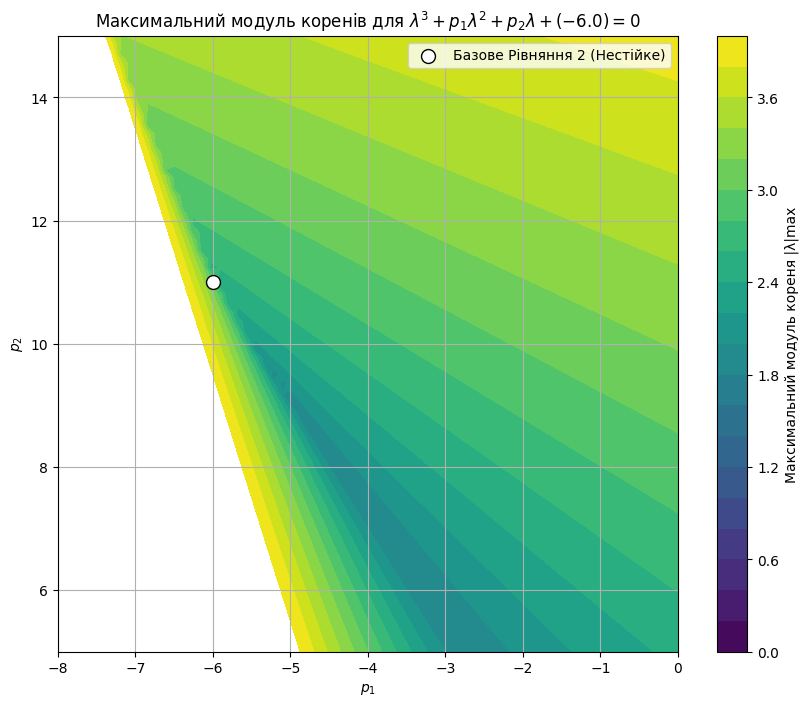

Знайдено 0 точок (комбінацій p1, p2) в досліджуваному діапазоні,
  де система 3-го порядку (з p3=-6.0) є асимптотично стійкою.
  Стійких точок в обраному діапазоні p1, p2 (з даним p3) не знайдено або вони дуже рідкісні.
----------------------------------------------------------------------


In [17]:
# --- 2.5.5.3 Дослідження області стійкості для рівняння 3-го порядку (Чисельний підхід) ---
print("\n--- 3. Дослідження Області Стійкості для Рівняння 3-го Порядку (Чисельно) ---")
print("Рівняння: lambda^3 + p1*lambda^2 + p2*lambda + p3 = 0")
print("Фіксуємо p3 = -6 (з Рівняння 2, де знаменник lambda^3 - 6lambda^2 + 11lambda - 6)")

p3_fixed = -6.0
p1_range_ord3_stab = np.linspace(-8, 0, 70) # Діапазон для p1 (біля -6)
p2_range_ord3_stab = np.linspace(5, 15, 70)  # Діапазон для p2 (біля 11)

P1_ord3, P2_ord3 = np.meshgrid(p1_range_ord3_stab, p2_range_ord3_stab)
max_root_magnitude = np.zeros_like(P1_ord3)
is_stable_region_ord3 = np.zeros_like(P1_ord3, dtype=bool)

for i in range(P1_ord3.shape[0]):
    for j in range(P1_ord3.shape[1]):
        current_p1 = P1_ord3[i, j]
        current_p2 = P2_ord3[i, j]
        # Коефіцієнти полінома: [1, current_p1, current_p2, p3_fixed]
        coeffs_poly_ord3_stab = [1, current_p1, current_p2, p3_fixed]
        roots_ord3_stab = np.roots(coeffs_poly_ord3_stab)
        max_root_magnitude[i, j] = np.max(np.abs(roots_ord3_stab))
        is_stable_region_ord3[i, j] = np.all(np.abs(roots_ord3_stab) < 1.0) # Умова асимптотичної стійкості

plt.figure(figsize=(10, 8))
cp = plt.contourf(P1_ord3, P2_ord3, max_root_magnitude, levels=np.linspace(0, 4, 21), cmap='viridis')
plt.colorbar(cp, label='Максимальний модуль кореня |λ|max')
# Намалюємо контур, де max_root_magnitude = 1 (межа стійкості)
plt.contour(P1_ord3, P2_ord3, max_root_magnitude, levels=[1.0], colors='red', linewidths=2)
plt.scatter([-6], [11], color='white', edgecolor='black', s=100, label='Базове Рівняння 2 (Нестійке)', zorder=5)
plt.title(f'Максимальний модуль коренів для $\lambda^3 + p_1\lambda^2 + p_2\lambda + ({p3_fixed:.1f}) = 0$')
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.legend()
plt.grid(True)
plt.savefig('stability_region_order3_numerical.png')
plt.show()

num_stable_points = np.sum(is_stable_region_ord3)
print(f"Знайдено {num_stable_points} точок (комбінацій p1, p2) в досліджуваному діапазоні,")
print(f"  де система 3-го порядку (з p3={p3_fixed}) є асимптотично стійкою.")
if num_stable_points > 0:
    stable_p1 = P1_ord3[is_stable_region_ord3]
    stable_p2 = P2_ord3[is_stable_region_ord3]
    print(f"  Приклад стійкої комбінації: p1={stable_p1[0]:.2f}, p2={stable_p2[0]:.2f}, p3={p3_fixed:.1f}")
    # Перевіримо корені для цієї комбінації
    coeffs_stable_example = [1, stable_p1[0], stable_p2[0], p3_fixed]
    roots_stable_example = np.roots(coeffs_stable_example)
    print(f"    Корені: {roots_stable_example}, Модулі: {np.abs(roots_stable_example)}")
else:
    print("  Стійких точок в обраному діапазоні p1, p2 (з даним p3) не знайдено або вони дуже рідкісні.")

print("-" * 70)